/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_15735/3776430263.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


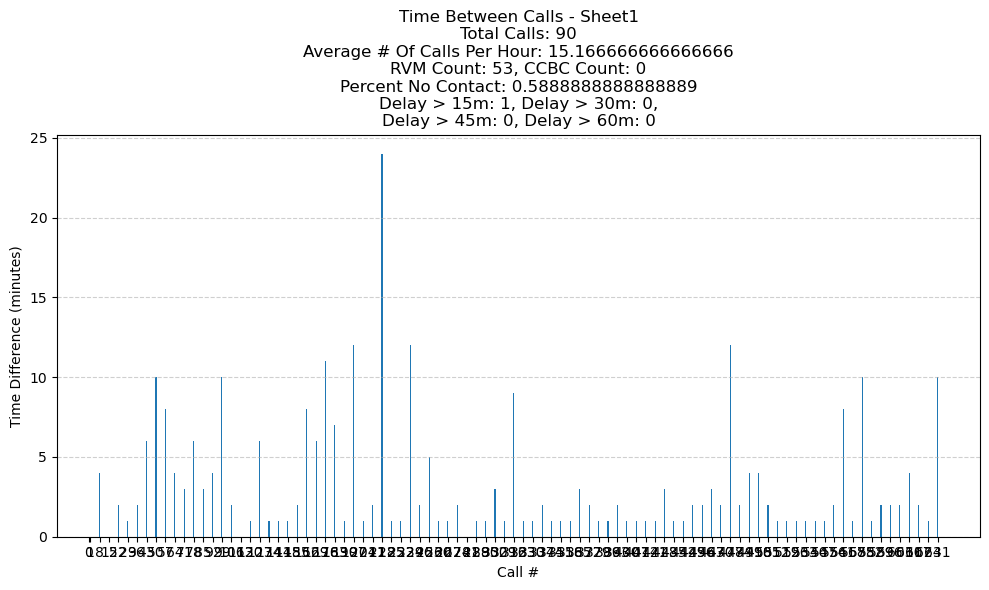

In [1]:
#Katie

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

df_dict = pd.read_excel('/Users/robertwrobel/Downloads/kg.xlsx', sheet_name=None)

def convert_to_datetime(time_str):
    return datetime.strptime(time_str, "%I:%M%p")

for sheet_name, df in df_dict.items():
    df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)
    
    rvm_count = df.apply(lambda col: col.str.contains("rvm", case=False, na=False) if col.dtype == 'object' else False).sum().sum()
    ccbc_count = df.apply(lambda col: col.str.contains("ccbc", case=False, na=False) if col.dtype == 'object' else False).sum().sum()
    nc_count = rvm_count + ccbc_count
    
    df = df.iloc[1::7]  
    df['Updated'] = df['Updated'] + "m"  

    df['Time'] = df['Updated'].apply(convert_to_datetime)  

    df['Delay'] = df['Time'].diff()  
    df.loc[0, 'Delay'] = pd.NaT  

    df['Delay2'] = df['Delay'].dt.total_seconds() / 60  

    total_delays = df['Delay2'].notna().sum()

    delay_15 = (df['Delay2'] > 15).sum()
    delay_30 = (df['Delay2'] > 30).sum()
    delay_45 = (df['Delay2'] > 45).sum()
    delay_60 = (df['Delay2'] > 60).sum()

    df['Hour'] = df['Time'].dt.hour  
    call_counts_per_hour = df.groupby('Hour').size()  
    total_calls = call_counts_per_hour.sum()  
    total_hours = call_counts_per_hour.size  
    avg_calls_per_hour = total_calls / total_hours if total_hours > 0 else 0  

    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df['Delay2'])
    plt.xlabel('Call #')
    plt.ylabel('Time Difference (minutes)')
    plt.title(f'Time Between Calls - {sheet_name}\n'
              f'Total Calls: {total_delays}\n'
              f'Average # Of Calls Per Hour: {avg_calls_per_hour}\n'
              f'RVM Count: {rvm_count}, CCBC Count: {ccbc_count}\n'
              f'Percent No Contact: {(nc_count/total_delays)}\n'
              f'Delay > 15m: {delay_15}, Delay > 30m: {delay_30},\n'
              f'Delay > 45m: {delay_45}, Delay > 60m: {delay_60}')
    plt.xticks(df.index)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()

    #plt.figure(figsize=(10, 6))
    #plt.hist(df['Delay2'], bins=10, edgecolor='black')
    #plt.xlabel('Time Difference (minutes)')
    #plt.ylabel('Frequency')
    #plt.title(f'Distribution of Time Differences - {sheet_name}\n')
    #plt.grid(axis='y', linestyle='--', alpha=0.6)
    #plt.tight_layout()

    #plt.show()


/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_35991/2917119436.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


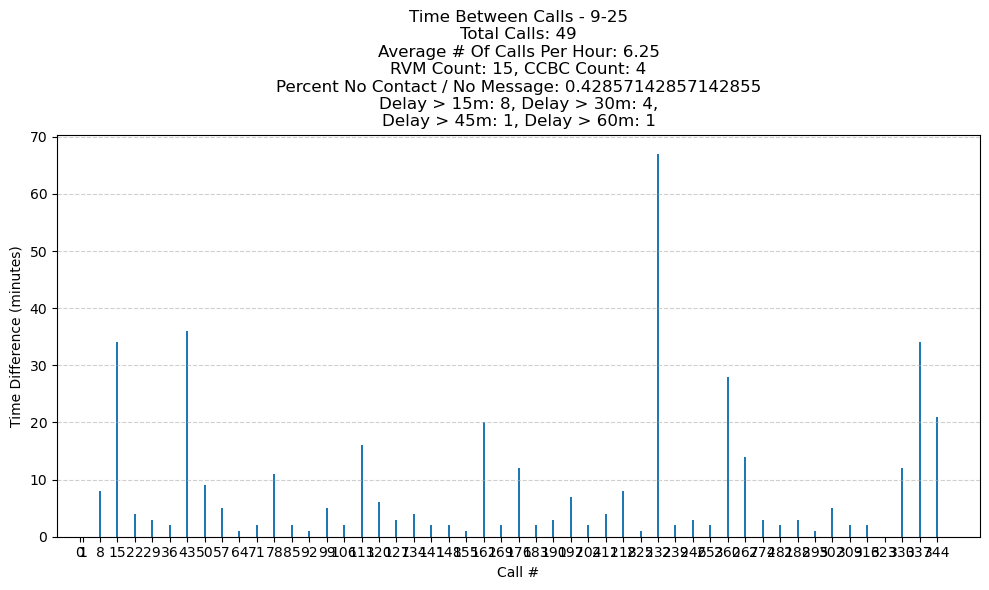

In [6]:
#Marcy

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

df_dict = pd.read_excel('/Users/robertwrobel/Downloads/my.xlsx', sheet_name=None)

def convert_to_datetime(time_str):
    return datetime.strptime(time_str, "%I:%M%p")

for sheet_name, df in df_dict.items():
    df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)
    
    rvm_count = df.apply(lambda col: col.str.contains("rvm", case=False, na=False) if col.dtype == 'object' else False).sum().sum()
    ccbc_count = df.apply(lambda col: col.str.contains("ccbc", case=False, na=False) if col.dtype == 'object' else False).sum().sum()
    vnsu_count = df.apply(lambda col: col.str.contains("vm not set up", case=False, na=False) if col.dtype == 'object' else False).sum().sum()
    mbfull_count = df.apply(lambda col: col.str.contains("mb full", case=False, na=False) if col.dtype == 'object' else False).sum().sum()

    nc_count = rvm_count + ccbc_count + mbfull_count + vnsu_count
    
    df = df.iloc[1::7]  
    df['Updated'] = df['Updated'] + "m"  

    df['Time'] = df['Updated'].apply(convert_to_datetime)  

    df['Delay'] = df['Time'].diff()  
    df.loc[0, 'Delay'] = pd.NaT  

    df['Delay2'] = df['Delay'].dt.total_seconds() / 60  

    total_delays = df['Delay2'].notna().sum()

    delay_15 = (df['Delay2'] > 15).sum()
    delay_30 = (df['Delay2'] > 30).sum()
    delay_45 = (df['Delay2'] > 45).sum()
    delay_60 = (df['Delay2'] > 60).sum()

    df['Hour'] = df['Time'].dt.hour  
    call_counts_per_hour = df.groupby('Hour').size()  
    total_calls = call_counts_per_hour.sum()  
    total_hours = call_counts_per_hour.size  
    avg_calls_per_hour = total_calls / total_hours if total_hours > 0 else 0  

    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df['Delay2'])
    plt.xlabel('Call #')
    plt.ylabel('Time Difference (minutes)')
    plt.title(f'Time Between Calls - {sheet_name}\n'
              f'Total Calls: {total_delays}\n'
              f'Average # Of Calls Per Hour: {avg_calls_per_hour}\n'
              f'RVM Count: {rvm_count}, CCBC Count: {ccbc_count}\n'
              f'Percent No Contact / No Message: {(nc_count/total_delays)}\n'
              f'Delay > 15m: {delay_15}, Delay > 30m: {delay_30},\n'
              f'Delay > 45m: {delay_45}, Delay > 60m: {delay_60}')
    plt.xticks(df.index)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()

    #plt.figure(figsize=(10, 6))
    #plt.hist(df['Delay2'], bins=10, edgecolor='black')
    #plt.xlabel('Time Difference (minutes)')
    #plt.ylabel('Frequency')
    #plt.title(f'Distribution of Time Differences - {sheet_name}\n')
    #plt.grid(axis='y', linestyle='--', alpha=0.6)
    #plt.tight_layout()

    #plt.show()
